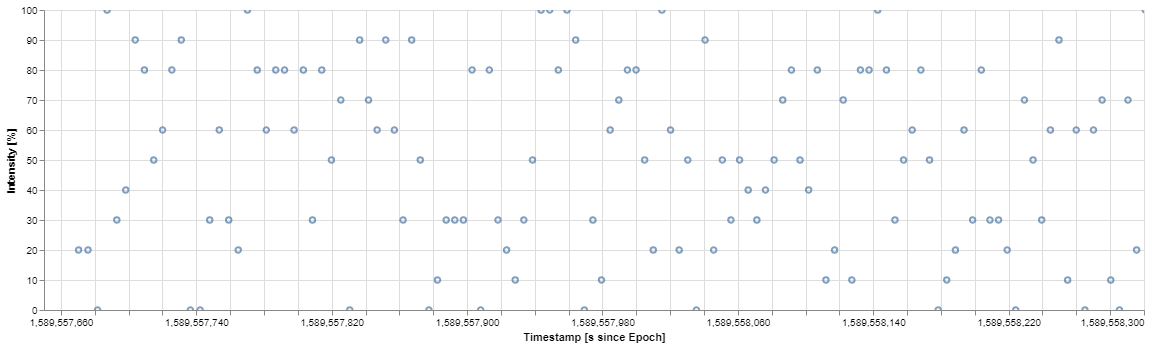

In [10]:
%config IPCompleter.greedy=True
import pandas as pd
import altair as alt

alt.data_transformers.enable('json')
command_intensity_times = pd.read_csv('command_intensity_times.csv')
logger_times_intensity = pd.read_csv('logger_times_intensity.csv')

# Timeline has too much data, calculate properties instead
commands = alt.Chart(command_intensity_times).mark_point(clip=True).encode(
    alt.X('After', scale=alt.Scale(domain=(1589557666, (1589557666 + 600))), title='Timestamp [s since Epoch]'),
    alt.Y('Value', title='Intensity [%]'),
).properties(
    width=1100
)
#logs = alt.Chart(command_intensity_times).mark_point(clip=True).encode(
#    alt.X('After', scale=alt.Scale(domain=(1589557666, (1589557666 + 600))), title='Timestamp [s since Epoch]'),
#    alt.Y('Value', title='Intensity [%]'),
#).properties(
#    width=1100
#)

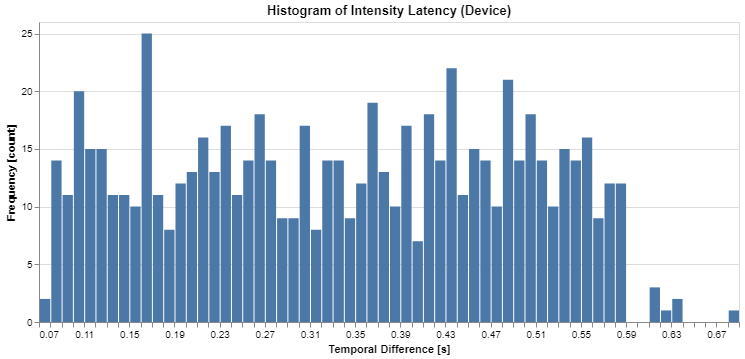

In [6]:
%config IPCompleter.greedy=True
import pandas as pd
import altair as alt

intensity_delays = pd.read_csv('intensity_device_delays.csv')

alt.Chart(intensity_delays).mark_bar(
                                                 ).transform_calculate(
    x='datum.LightChanged - datum.ValueChanged'
).encode(
    alt.X('x:Q', bin=alt.Bin(step=0.01), title='Temporal Difference [s]'),
    alt.Y('count()', title='Frequency [count]'),
).properties(
    width=700,
    title='Histogram of Intensity Latency (Device)'
)

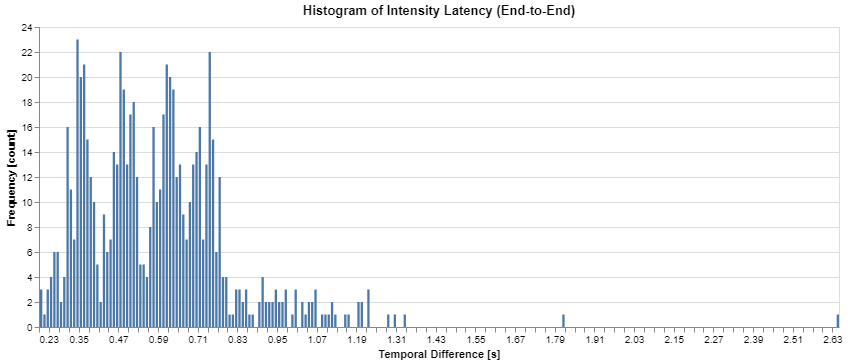

In [34]:
%config IPCompleter.greedy=True
import pandas as pd
import altair as alt

intensity_delays = pd.read_csv('intensity_delays.csv')

alt.Chart(intensity_delays).mark_bar(
                                                 ).transform_calculate(
    x='datum.LightChanged - datum.CommandTime'
).encode(
    alt.X('x:Q', bin=alt.Bin(step=0.01), title='Temporal Difference [s]'),
    alt.Y('count()', title='Frequency [count]'),
).properties(
    width=800,
    title='Histogram of Intensity Latency (End-to-End)'
)

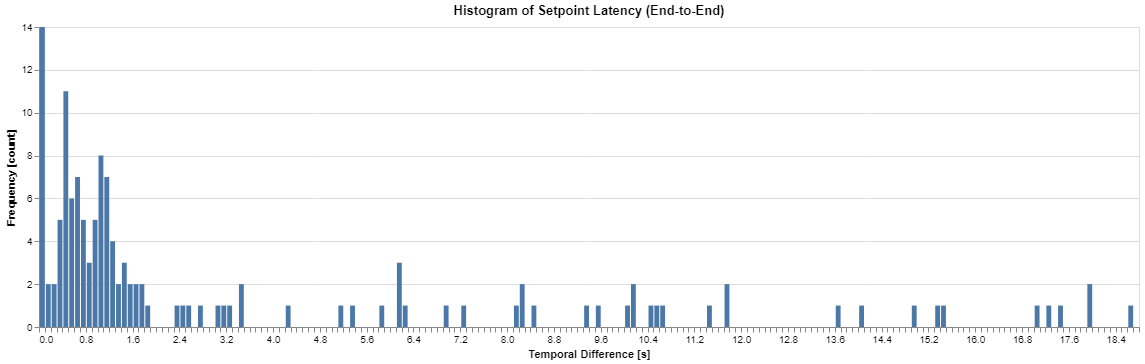

In [11]:
%config IPCompleter.greedy=True
import pandas as pd
import altair as alt

setpoint_delays = pd.read_csv('setpoint_delays.csv')

alt.Chart(setpoint_delays).mark_bar(
                                                 ).transform_calculate(
    x='datum.LogTime - datum.CommandTime'
).encode(
    alt.X('x:Q', bin=alt.Bin(step=0.1), title='Temporal Difference [s]'),
    alt.Y('count()', title='Frequency [count]'),
).properties(
    width=1100,
    title='Histogram of Setpoint Latency (End-to-End)'
)

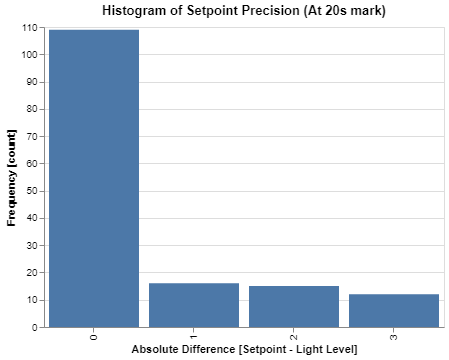

In [22]:
%config IPCompleter.greedy=True
import pandas as pd
import altair as alt

setpoint_delays = pd.read_csv('setpoint_precision.csv')

alt.Chart(setpoint_delays).mark_bar(
                                                 ).encode(
    alt.X('AbsDiff:N', title='Absolute Difference [Setpoint - Light Level]'),
    alt.Y('count()', title='Frequency [count]'),
).properties(
    width=400,
    title='Histogram of Setpoint Precision (At 20s mark)'
)

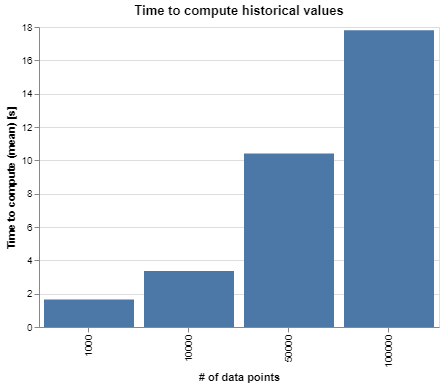

In [1]:
%config IPCompleter.greedy=True
import pandas as pd
import altair as alt

computation_delays = pd.read_csv('plot_test_results.csv')

alt.Chart(computation_delays).mark_bar(
                                                 ).encode(
    alt.X('Amount:N', title='# of data points'),
    alt.Y('mean(Time)', title='Time to compute (mean) [s]'),
).properties(
    width=400,
    title='Time to compute historical values'
)

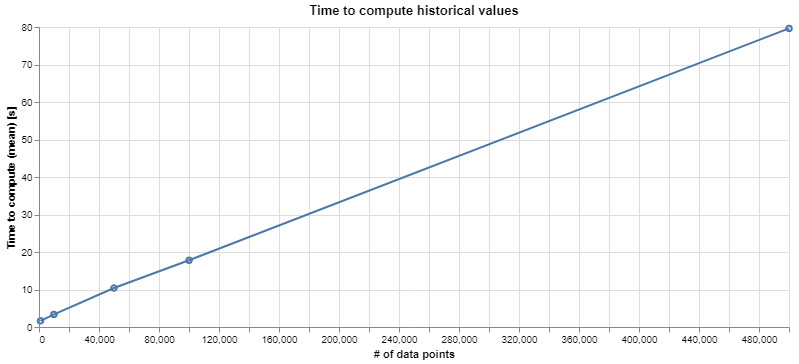

In [7]:
%config IPCompleter.greedy=True
import pandas as pd
import altair as alt

computation_delays = pd.read_csv('plot_test_results.csv')

base = alt.Chart(computation_delays).mark_point(
                                                 ).encode(
    alt.X('Amount', title='# of data points'),
    alt.Y('mean(Time)', title='Time to compute (mean) [s]'),
).properties(
    width=750,
    title='Time to compute historical values'
)

lines = alt.Chart(computation_delays).mark_line(
                                                 ).encode(
    alt.X('Amount', title='# of data points'),
    alt.Y('mean(Time)', title='Time to compute (mean) [s]'),
).properties(
    width=750,
    title='Time to compute historical values'
)

alt.layer(base, lines)